In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud


In [2]:
df=pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [3]:
x=df['Text']
y=df["Category"]

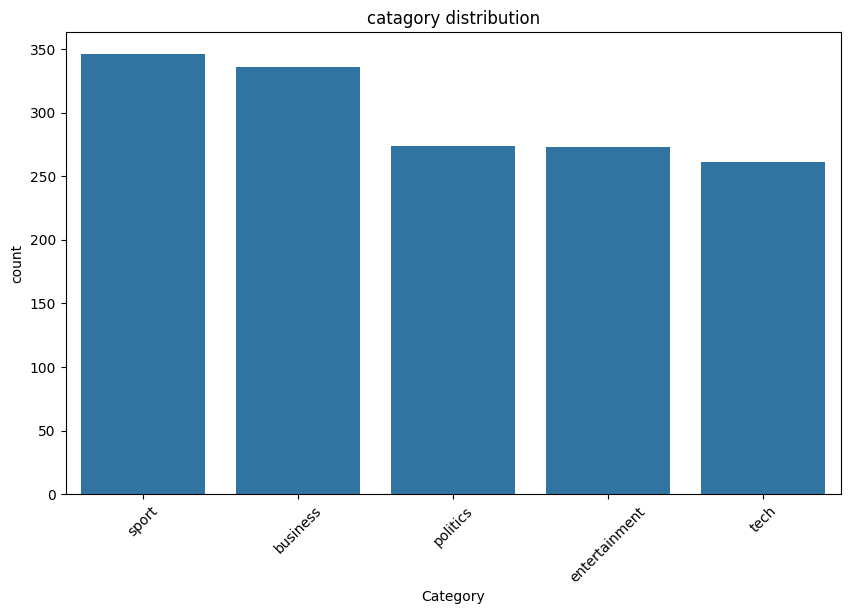

In [4]:
# catagorey distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Category',order=df["Category"].value_counts().index)
plt.xticks(rotation=45)
plt.title("catagory distribution")
plt.show()

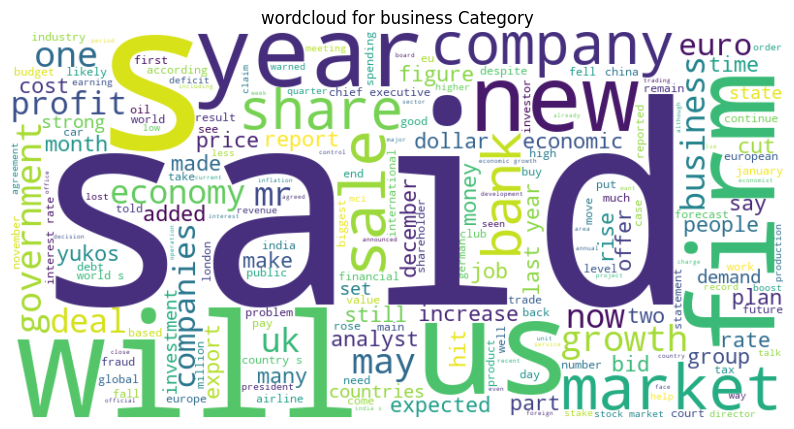

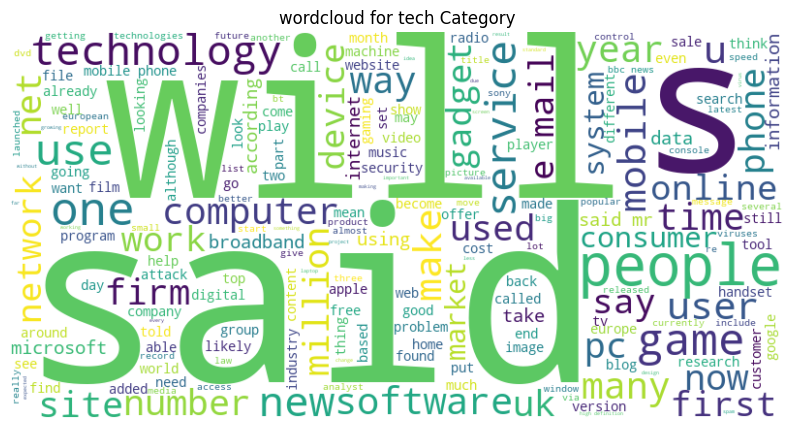

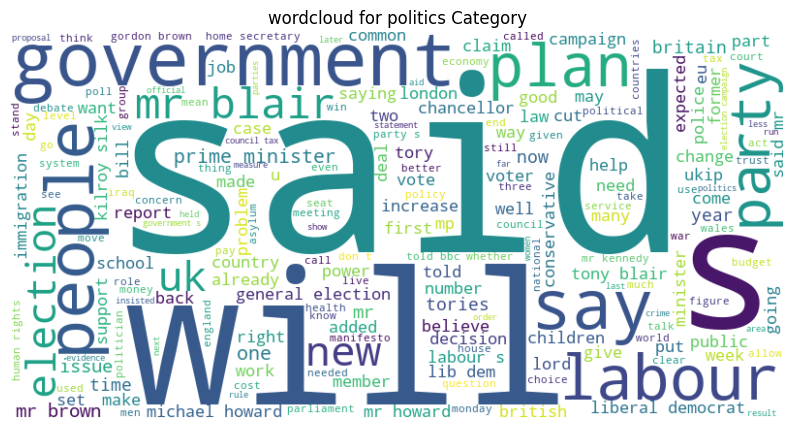

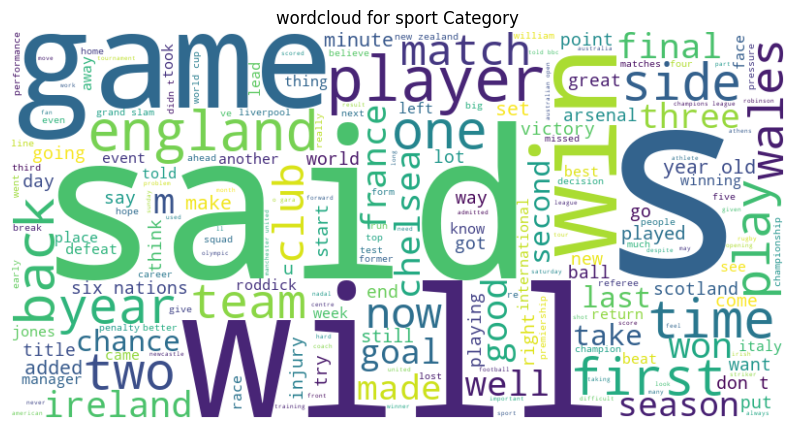

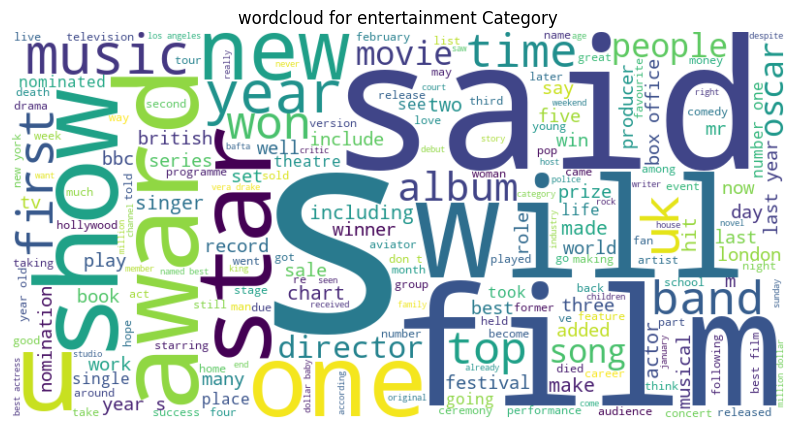

In [5]:
for category in df['Category'].unique():
    text=" ".join(df[df["Category"]==category]["Text"].values)
    wordcloud=WordCloud(width=800,height=400,background_color="white").generate(text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.title(f"wordcloud for {category} Category")
    plt.axis("off")
    plt.show()

In [21]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lalitramanmishra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lalitramanmishra/nltk_data...


True

In [26]:
lemmatizer=WordNetLemmatizer()
stop_words=set(stopwords.words('english'))
print(stop_words)

{"wouldn't", 'few', "shan't", 'between', 'because', 'which', 'has', 'a', 'with', 'from', 'themselves', 'mightn', 'under', 'now', 'ours', 'why', "wasn't", 'whom', 'only', 'yourself', 'the', "you're", 'her', "you'll", 'd', 'you', 'needn', "that'll", 'off', 'ma', 'yours', 'm', 'can', 'o', 'am', 'if', 'wasn', 'in', 'both', 'do', 'aren', 'or', 'll', 'his', 'he', 'into', "doesn't", 'my', 'very', 'won', 'just', 'isn', 'weren', 'what', 'hasn', 'other', 'herself', 't', 'not', 'once', 'them', 'nor', 'had', 'out', 'will', "couldn't", 'most', 'y', 'below', 'our', 'couldn', 'and', "shouldn't", 'shouldn', 'this', 'does', 'than', 'then', 'there', 'about', 'each', "didn't", 'your', 'during', "hadn't", 'it', 'any', 'all', 're', 'as', 'when', 'ourselves', "isn't", "you've", 'did', 'against', 'i', 'here', 'after', 'more', 'but', 'on', 'was', 'who', 'by', "mustn't", "she's", 'further', 'mustn', 'that', 'doing', 'an', 'theirs', 'itself', 'are', "won't", 'up', 'those', 'she', 'same', 'over', 'don', 'until',

In [27]:
def preprocess_text(text ):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    words = word_tokenize(text) 
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['Text'] =df['Text'].apply(preprocess_text)
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex bos launch defence lawyer defendin...,business
1,154,german business confidence slide german busine...,business
2,1101,bbc poll indicates economic gloom citizen majo...,business
3,1976,lifestyle governs mobile choice faster better ...,tech
4,917,enron boss payout eighteen former enron direct...,business


In [28]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
nb_model=make_pipeline(TfidfVectorizer(stop_words='english'),MultinomialNB())

In [30]:
nb_model = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB())
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Accuracy=", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Accuracy= 0.9563758389261745
               precision    recall  f1-score   support

     business       0.94      0.97      0.95        75
entertainment       1.00      0.96      0.98        46
     politics       0.91      0.95      0.93        56
        sport       0.97      1.00      0.98        63
         tech       0.98      0.90      0.94        58

     accuracy                           0.96       298
    macro avg       0.96      0.95      0.96       298
 weighted avg       0.96      0.96      0.96       298



In [39]:
new_texts=[
    " The lastest football match ended in a draw, with greatest performances from both team.",
    "The government announced new tarrifs ahead of G20 summit",
    "Though he was not yet officially in his post, Witkoff flew to Tel Aviv to meet Netanyahu before the deal was brokered in Qatar. He then spent time with Biden's envoy Brett McGurk in Doha, who later praised their cooperation, calling it a very close partnership, even friendship, according to the Washington Post."
    
]
new_preds=nb_model.predict(new_texts)
for text,predictions in zip(new_texts,new_preds):
    print(f"Text: {text} \n predicted category {predictions}\n")

Text:  The lastest football match ended in a draw, with greatest performances from both team. 
 predicted category sport

Text: The government announced new tarrifs ahead of G20 summit 
 predicted category politics

Text: Though he was not yet officially in his post, Witkoff flew to Tel Aviv to meet Netanyahu before the deal was brokered in Qatar. He then spent time with Biden's envoy Brett McGurk in Doha, who later praised their cooperation, calling it a very close partnership, even friendship, according to the Washington Post. 
 predicted category sport



In [ ]:
from xgboost 